# 4.9 Intro In Data Visualization w/ Python Part 2

## This script will contain the following 
1. Import Libraries and data
2. Charts from exercise
3. A Histogram of the order hour of day column 
4. A bar chart from loyal flag column 
5. A Line Chart of differences of expenditures based on time of day
6. A line chart showing connection between age and family 
7. A Scatterplot chart 


### Import Libraries and Data

In [1]:
#import libraries 
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy 


In [2]:
#Set Path 
path= r'C:\Users\hmaio\Documents\4.0 Instacart Project'

In [4]:
# Import Data 
df_merged_final = pd.read_pickle(os.path.join(path, '4.0 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [32]:
df_merged_final.head()

,user_id,First_Name,Last_Name,Gender,STATE,Age,date_joined,no_of_dependants,fam_status,income,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_days_since_order,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Regularly busy,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-Range Product,Least busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer


### Charts from Exercise

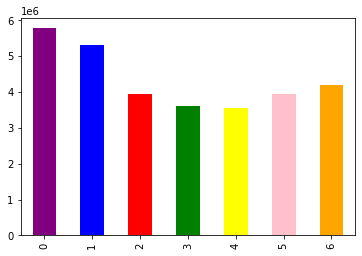

In [7]:
# Create a bar chart showing orders of the week
bar= df_merged_final ['orders_day_of_week'].value_counts().sort_index().plot.bar(color = [ 'purple', 'blue', 'red', 'green', 'yellow', 'pink', 'orange'])

<AxesSubplot:ylabel='Frequency'>

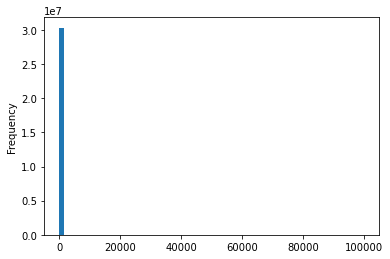

In [8]:
# create histogram
df_merged_final['prices'].plot.hist(bins=70)

In [9]:
df_merged_final['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [11]:
# assigning outliners as nan 
df_merged_final.loc[df_merged_final['prices'] >100, 'prices'] = np.nan

In [12]:
# checking max
df_merged_final['prices'].max()

25.0

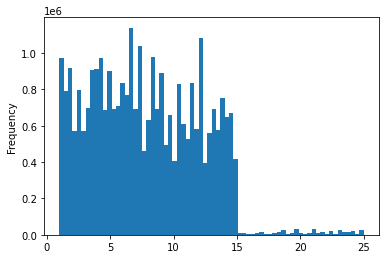

In [14]:
# creating historgram 
hist=df_merged_final['prices'].plot.hist(bins=70)

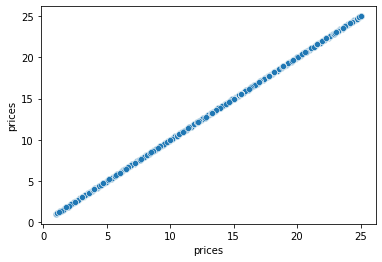

In [43]:
#create scatterplot
scat1=sns.scatterplot(x = 'prices', y = 'prices',data = df_merged_final)

In [24]:
# create a random sampling 
np.random.seed(4)

In [25]:
#Creating a list holding True/False values to test np.random.rand() <= 0.7

dev= np.random.rand(len(df_merged_final)) <= 0.7

In [26]:
# store 70% of sample as big 

big= df_merged_final[dev]

In [27]:
# Store 30% of sample as small 

small = df_merged_final[~dev]

In [28]:
len(df_merged_final)

30328763

In [29]:
len(big) + len(small)

30328763

In [30]:
df_2 = small[['orders_day_of_week','prices']]

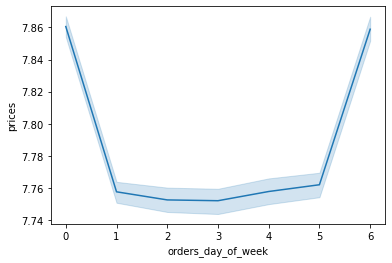

In [31]:
#create a line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

### A Histogram of the order hour of day column

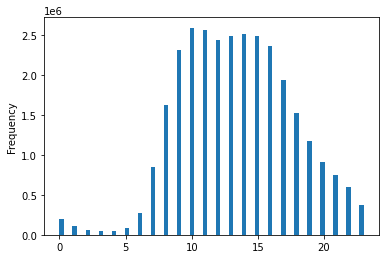

In [35]:
hist2=df_merged_final['order_time_of_day'].plot.hist(bins=70)

This histogram demonstrates the frequency of orders places as it relates to the hour of the day. Most orders coming in late morning and afternoon. 

### A bar chart from loyal flag column

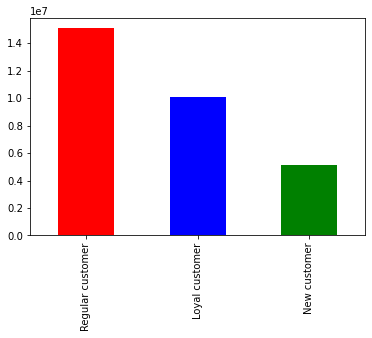

In [33]:
#create a bar chart showing loyalty flag 

bar2  = df_merged_final['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

### A Line Chart of differences of expenditures based on time of day

In [36]:
# creating smaller dataframe to be used in line chart 
df_expend_hour = small[['order_time_of_day', 'prices']]

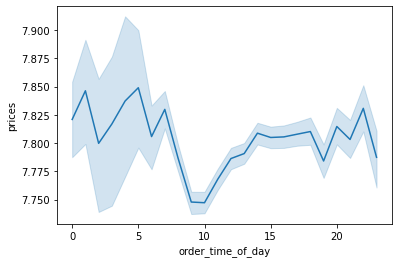

In [37]:
# creating a line chart to show expenditures based on time of day
line2 = sns.lineplot(data = df_expend_hour, x = 'order_time_of_day', y = 'prices')

### A line chart showing connection between age and family 

In [41]:
# creating smaller dataframe to be used in line chart 
df_age_fam = small [['no_of_dependants', 'Age']]

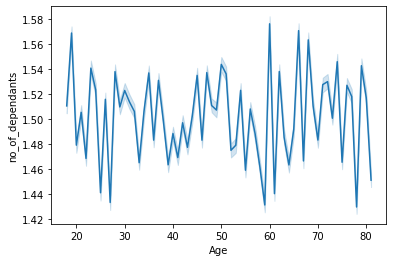

In [42]:
#creating a line chart 
line3 = sns.lineplot(data = df_age_fam, x = 'Age', y = 'no_of_dependants')

This line chart above shows the connection between age and number of dependants. It appears number of dependants is slighly higher after age 60.

### A Scatterplot chart showing connection between age and income

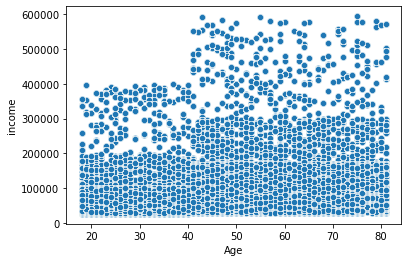

In [46]:
# creating a scatterplot showing connection between age and income
scat2 = sns.scatterplot(x = 'Age', y = 'income', data = df_merged_final)

The scatterplot shows the relationship between a person age and there income. It appears people over 40 have a higher income which means more spending power. Also it appears most customers have a high income of 200000. Perhaps that means instacart users are people with more disposable income.  

## Exporting visuals 

In [47]:
scat1.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'scat_4_9.png'))

In [48]:
line.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'line_4_9.png'))

In [49]:
hist2.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'hist_order_time.png'))

In [50]:
bar2.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'bar_loyal.png'))

In [51]:
line2.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'line_expend_hour.png'))

In [52]:
line3.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'line_age_depend.png'))

In [53]:
scat2.figure.savefig(os.path.join(path, '4.0 Analysis', 'Visualizations', 'scat_age_income.png'))